# Introduction to Convolutional Neural Netwroks and Computer Vision with TensorFlow

computer vision is the practice of writing algoriths which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data


The images will be Food101 dataset
(101 different classes of food)

However  we've modified it to only use two classes (pizza & steak)


using the image data modification notebook:


>**Note:** Starting with a smaller dataset so we can experiment quickly and figure what works(or better yet what doesn't work)
before scaling up



In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-01-31 11:07:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   221MB/s    in 0.5s    

2022-01-31 11:07:58 (221 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("./pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)


A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project,, this usually means visualizing many samples of our data


In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
import os

# walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 31 11:07 .
drwxr-xr-x 1 root root 4096 Jan 31 11:07 ..
drwxr-xr-x 4 root root 4096 Jan 31 11:07 test
drwxr-xr-x 4 root root 4096 Jan 31 11:07 train


In [8]:
# Another way to find out how many images are in a file
num_steak_imgaes_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_imgaes_train

750


To visualize our images, let's get the class names programmatically

In [9]:
# Get the classnames programmatically

import pathlib

import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories

In [10]:
print(class_names)

['pizza' 'steak']


In [11]:
# Let's visualzie our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)

  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['1225762.jpg']
Image shape: (512, 289, 3)


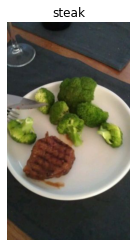

In [12]:

# View a random image from the training dataset

img = view_random_image(target_dir= "pizza_steak/train/",
                        target_class = "steak")

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[ 64,  69,  62],
        [ 65,  68,  61],
        [ 69,  69,  61],
        ...,
        [ 52,  59,  67],
        [ 52,  59,  67],
        [ 44,  55,  77]],

       [[ 63,  68,  62],
        [ 63,  66,  59],
        [ 65,  66,  58],
        ...,
        [ 53,  60,  68],
        [ 52,  59,  67],
        [ 45,  56,  74]],

       [[ 66,  71,  65],
        [ 66,  69,  62],
        [ 67,  68,  60],
        ...,
        [ 55,  62,  70],
        [ 53,  60,  68],
        [ 49,  61,  75]],

       ...,

       [[ 96,  63,  28],
        [ 98,  65,  30],
        [101,  68,  33],
        ...,
        [ 30,  42,  42],
        [ 29,  41,  41],
        [ 34,  39,  43]],

       [[ 98,  65,  30],
        [ 99,  66,  31],
        [101,  68,  33],
        ...,
        [ 30,  42,  42],
        [ 29,  41,  41],
        [ 32,  35,  44]],

       [[100,  67,  32],
        [100,  67,  32],
        [101,  68,  33],
        ...,
        [ 31,  41,  4

In [14]:
# View the image shape

img.shape # returns width, height, colour channels

(512, 289, 3)

In [15]:
# Get all the pixel values between 0 & 1

img/255.

array([[[0.25098039, 0.27058824, 0.24313725],
        [0.25490196, 0.26666667, 0.23921569],
        [0.27058824, 0.27058824, 0.23921569],
        ...,
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.17254902, 0.21568627, 0.30196078]],

       [[0.24705882, 0.26666667, 0.24313725],
        [0.24705882, 0.25882353, 0.23137255],
        [0.25490196, 0.25882353, 0.22745098],
        ...,
        [0.20784314, 0.23529412, 0.26666667],
        [0.20392157, 0.23137255, 0.2627451 ],
        [0.17647059, 0.21960784, 0.29019608]],

       [[0.25882353, 0.27843137, 0.25490196],
        [0.25882353, 0.27058824, 0.24313725],
        [0.2627451 , 0.26666667, 0.23529412],
        ...,
        [0.21568627, 0.24313725, 0.2745098 ],
        [0.20784314, 0.23529412, 0.26666667],
        [0.19215686, 0.23921569, 0.29411765]],

       ...,

       [[0.37647059, 0.24705882, 0.10980392],
        [0.38431373, 0.25490196, 0.11764706],
        [0.39607843, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more speicifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* compile our CNN
* Fit the CNN to tour training data



In [16]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# set the seed

tf.random.set_seed(42)

# Preproces data (get all of the pixel values between 0 & 1 , also called normalization)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to tour data directories

train_dir = "/content/pizza_steak/train"
test_dir  = "/content/pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory =train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)




# Build a CNN model (same as the Tiny VGG  on the CNN explainer webiste)

model_1  = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(filters = 10,
                                      kernel_size = 3,
                                      activation = "relu",
                                      input_shape = (224,224,3)),
                tf.keras.layers.Conv2D(10,3,activation = "relu"),
                tf.keras.layers.MaxPool2D(pool_size = 2,
                                          padding ="valid"),
                tf.keras.layers.Conv2D(10,3,activation = "relu"),
                tf.keras.layers.Conv2D(10,3,activation = "relu"),
                # tf.keras.layers.Activations(tf.nn.relu), same as activation ="relu" if we don't want to use activation in the Conv2D layer.
                tf.keras.layers.MaxPool2D(2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation = "sigmoid")
])


# Compile our CNN

model_1.compile(loss ="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model

history_1 = model_1.fit(train_data,
            epochs =5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data)
            )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 259ms/step - loss: 0.6226 - accuracy: 0.6340 - val_loss: 0.5138 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4672 - accuracy: 0.7873 - val_loss: 0.3651 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.4070 - accuracy: 0.8260 - val_loss: 0.3469 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3618 - accuracy: 0.8493 - val_loss: 0.2957 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3493 - accuracy: 0.8460 - val_loss: 0.3245 - val_accuracy: 0.8660


> 📓**Note:** If the above cell is taking longer than ~10
seconds per epoch, make sure using a GPU by going to Runtime -> Change Runtime Type -> Hardwaare Accelerator -> GPU

In [17]:
# Get a model sumamry

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/exercise:** Go through CNN explainer website https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Replicate the model we've built in a previous section to see if it works with image data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88160&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [18]:
# Set random seed

tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),

])

# Compile the model

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 1.4009 - accuracy: 0.5107 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1),
model_2 performs terribly



So Improve it!!

In [20]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (224,224,3)),
      tf.keras.layers.Dense(100,activation = "relu"),
      tf.keras.layers.Dense(100,activation = "relu"),
      tf.keras.layers.Dense(100,activation = "relu"),
      tf.keras.layers.Dense(1,activation ="sigmoid")
])


model_3.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch=len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 3.0783 - accuracy: 0.6087 - val_loss: 0.8327 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.7753 - accuracy: 0.7300 - val_loss: 1.0044 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.7447 - accuracy: 0.7167 - val_loss: 0.6133 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6027 - accuracy: 0.7453 - val_loss: 0.5845 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5730 - accuracy: 0.7653 - val_loss: 0.5537 - val_accuracy: 0.7320


In [21]:
# Get a summary of model_3

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification Let's break it down


1. Become one with  data (Visualize, Visualize, Visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repaeat unitl satified (experiment, experiment, experiment


### 1. Beome one with the data



['40094.jpg']
Image shape: (384, 512, 3)
['2990023.jpg']
Image shape: (384, 512, 3)


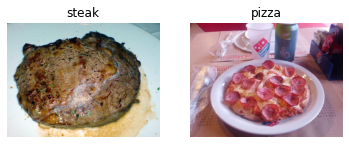

In [22]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths 

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,
000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of
processor(GPU)

2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

WHy 32?



In [24]:
!nvidia-smi


Mon Jan 31 11:11:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   1304MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [26]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, #  Target directoy of images
                                               target_size=(224,224), # Target size of image data
                                               class_mode= "binary", # Type of data working with
                                               batch_size = 32) # size of mini batches

# valid_data = ...



test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images labels in train data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
# Get the first two images

images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels

labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or exisiting result that setting up when beginning a ML experiment, we try to beat the baseline

> **Note:** In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on our data and then introduce complexity as required (e.g. look at which current model is performing best in the filed for our problem)

In [32]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential




In [33]:
from tensorflow.python.keras.engine import sequential
# Create the model (this will be our baseline, a layer convolutional model)

model_4 = Sequential([
                      Conv2D(filters= 10, # filter is the number of sliding windows going across an input. (higher = more complex model)
                             kernel_size = (3,3), # the size of the sliding window going across an input
                             strides = (1,1), # the size of the step the sliding window takes across an input
                             padding = "same", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
                             activation = "relu",
                             input_shape = (224,224,3)), # input layer (specify input image)
                      Conv2D(10,3,activation = "relu"),
                      Conv2D(10,3,activation = "relu"),
                      Flatten(),
                      Dense(1,activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)

])

In [34]:
# Compile the model

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [35]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test datag generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model

history_4 = model_4.fit(train_data, # The combinatinon of labels and sample data
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 254ms/step - loss: 0.7845 - accuracy: 0.7047 - val_loss: 0.4178 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 15s 310ms/step - loss: 0.4054 - accuracy: 0.8273 - val_loss: 0.4195 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 18s 383ms/step - loss: 0.2655 - accuracy: 0.9180 - val_loss: 0.3745 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 14s 296ms/step - loss: 0.1104 - accuracy: 0.9713 - val_loss: 0.5064 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.0585 - accuracy: 0.9833 - val_loss: 0.6030 - val_accuracy: 0.7800


### 5. Evaluating our model

It looks like our model is learning something, Evaluate it!!

In [38]:
import pandas as pd

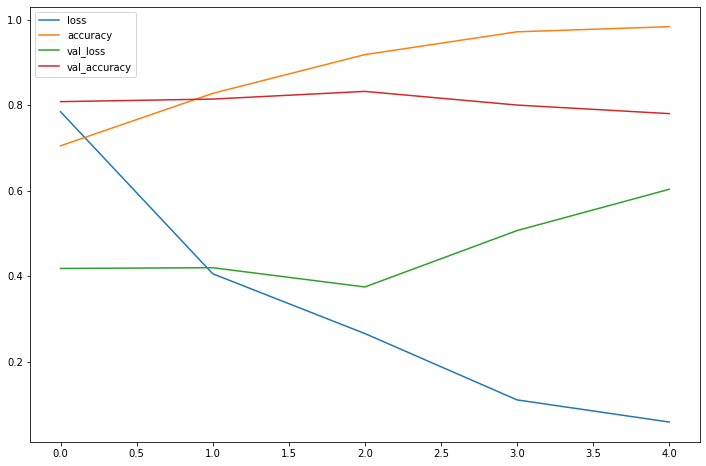

In [39]:
pd.DataFrame(history_4.history).plot(figsize=(12,8))

In [40]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separateloss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs 

  # Plot loss

  plt.plot(epochs,loss, label = "training_loss")
  plt.plot(epochs, val_loss,label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy,label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus model's ability to generalize to unseen data will be diminished.

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other(training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**

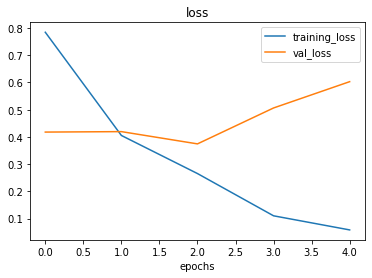

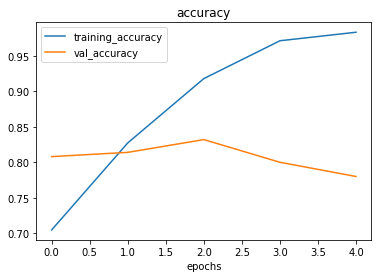

In [41]:
# Check out model_4

plot_loss_curves(history_4)

### 6. Adjust the model parameters


Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting



Ways to induce ovefitting

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Redcue overfitting: 
* Add data augmentation
* Add regularization layers (sucha s MaxPool2D)
* Add more data...


> **Note:** Reducing overfitting is also known as **regularization.**

In [42]:
# Create the model (this is going to be our new baseline)


model_5 = tf.keras.Sequential([
                               Conv2D(10,3,activation = "relu",input_shape=(224,224,3)),
                               MaxPool2D(pool_size =2),
                               Conv2D(10,3,activation ="relu"),
                               MaxPool2D(),
                               Conv2D(10,3,activation ="relu"),
                               MaxPool2D(),
                               Flatten(),
                               Dense(1,activation = "sigmoid")

])

In [43]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [44]:

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6438 - accuracy: 0.6533 - val_loss: 0.5056 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5080 - accuracy: 0.7600 - val_loss: 0.4096 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4442 - accuracy: 0.8073 - val_loss: 0.3863 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4313 - accuracy: 0.8160 - val_loss: 0.3735 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4123 - accuracy: 0.8260 - val_loss: 0.3585 - val_accuracy: 0.8460


In [45]:
# Get a summary of model with max pooling

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [46]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


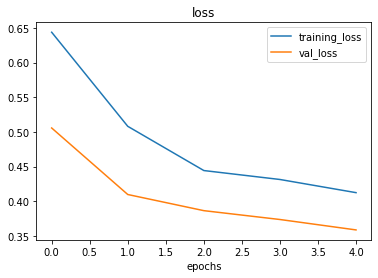

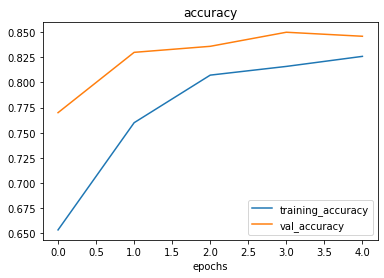

In [47]:
# Plot loss curves

plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation




In [48]:
# Create ImageDataGenerator training with data augemntation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, # how much do we want to rotate an image?
                                             shear_range = 0.2, # how much do we want to shear image?
                                             zoom_range =  0.2, 
                                             width_shift_range = 0.2,
                                             height_shift_range= 0.3,
                                             horizontal_flip = True) # do we want to flip an image?


# Create ImgaeDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale  = 1/255.)


# Create ImgaeDataGenerator without data augmentation for the test dataset

test_datagen = ImageDataGenerator(rescale = 1/255.)



> **Question:** What is data augmentaion


Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more gneralizable (hopefully) patterns.

Altering might mean adjusting the rotation of an imgae, fliiping it, cropping it or something similar.


In [49]:
# Visualizing the data augmentation

# Import data and augmented it from training directory


print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size = (224,224),
                                                                batch_size = 32,
                                                                class_mode = "binary",
                                                                shuffle = False) # For demonstration purposes only!!



# Create non-augmented train data batches 
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)


# Create non-augmented test data batches
IMG_SIZE = (224,224)

print("Non-augmnetd test data")

test_data = (test_datagen.flow_from_directory(test_dir,
                                              target_size = IMG_SIZE,
                                              batch_size = 32,
                                              class_mode = "binary"))

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmnetd test data
Found 500 images belonging to 2 classes.


> **Note:** Data augemntation is usually only performed on the training data. Using `ImageDataGenerator` built in data augmentation prarameters our images are left as they are in the directories but are modified as their loaded into the model.

Finally Visualize the data!!

In [50]:

# Get sample data batches

images, labels = train_data.next()

augmented_images, _ = train_data_augmented.next() # Note : labels aren't augmented.. only data(images)

showing image number : 0


(-0.5, 223.5, 223.5, -0.5)

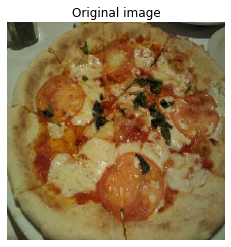

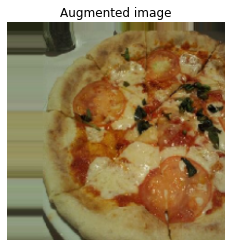

In [51]:
# Show original imgae and augmented image
import random
random_number =random.randint(0,32) # our batch sizes are 32...
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


Now we've seen what augmented training data looks like 
let's build a model and see how it learns

In [52]:
# Create a model (Same as model_5)

model_6 = tf.keras.Sequential([
                               Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
                               MaxPool2D(pool_size = 2),
                               Conv2D(10,3,activation = "relu"),
                               MaxPool2D(),
                               Conv2D(10,3,activation = "relu"),
                               MaxPool2D(),
                               Flatten(),
                               Dense(1,activation = "sigmoid")
])


# Compile the model

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics  = ["accuracy"])


# Fit the model

history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data  = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 856ms/step - loss: 0.7232 - accuracy: 0.4840 - val_loss: 0.6873 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6905 - accuracy: 0.5373 - val_loss: 0.6814 - val_accuracy: 0.5780
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6925 - accuracy: 0.5413 - val_loss: 0.6714 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 28s 595ms/step - loss: 0.6796 - accuracy: 0.6333 - val_loss: 0.6325 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 36s 758ms/step - loss: 0.6632 - accuracy: 0.6080 - val_loss: 0.6408 - val_accuracy: 0.5940


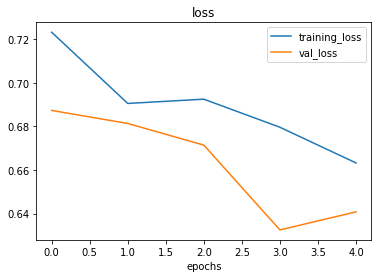

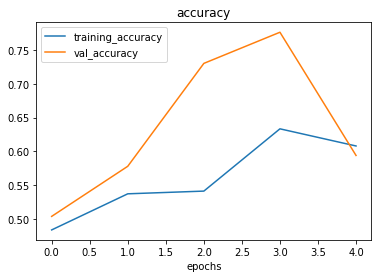

In [53]:
# Check our models training curves

plot_loss_curves(history_6)

Let's shuffle our augmented training data and train an another model (the same as before) on it and see what happens

In [54]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32,
                                                                            shuffle = False)

Found 1500 images belonging to 2 classes.


In [77]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 590ms/step - loss: 0.7611 - accuracy: 0.4440 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6978 - accuracy: 0.5060 - val_loss: 0.6846 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 32s 690ms/step - loss: 0.6898 - accuracy: 0.5047 - val_loss: 0.6781 - val_accuracy: 0.5120
Epoch 4/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6824 - accuracy: 0.5527 - val_loss: 0.6651 - val_accuracy: 0.6160
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6602 - accuracy: 0.6253 - val_loss: 0.6149 - val_accuracy: 0.6240


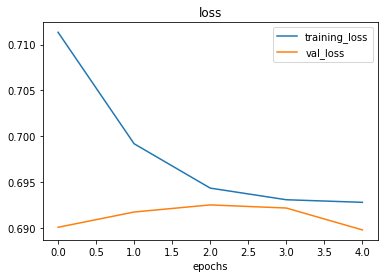

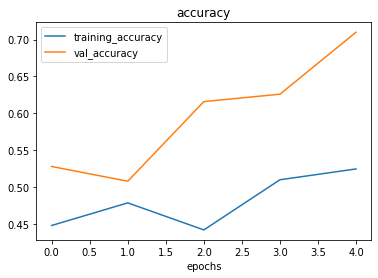

In [56]:
# Plot loss curves

plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat unitl satified


Since we've already beaten our baseline, there are a few things we oculd try to continue to improve the model:


* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)

* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)

* Train for longer (more epochs)

* Find an ideal learning rate

* Get more data (give the model more opportunities to learn)

* Use **transfer learning** to leverage what another image model has learn and adjust it for our use case


## Making a prediction with our trained model on our custom data


In [78]:
# Classes working with

print(class_names)

['pizza' 'steak']


--2022-01-31 11:40:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-31 11:40:11 (33.0 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

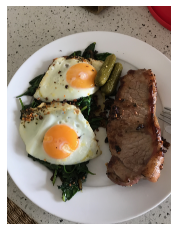

In [79]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [80]:
# Check the shape of our image

steak.shape

(4032, 3024, 3)

**Note:** when we train neural network and we want to make a prediction with it on our own custom data, it's important than our custom data ( or new data) is preprocessed into the same format as the data our model wants to be trained

In [102]:
# Create a function to import and image and resize it to be able to be used with our model 

def load_and_prep_image(filename,img_shape = 224):

  """
  Reads an image from filenae, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  # our model is trained on images with 3 colour channels and someimes images have 4 colour channels
  img = tf.image.decode_image(img,channels  = 3)

  # Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [103]:

# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [104]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.66819406]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice as visualize the image as well as the model's prediction?


In [105]:
# Remid ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [88]:
# We can index the predicted class by round
pred_class =class_names[int(tf.round(pred))]
pred_class

'steak'

In [89]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  
  # Import the target image and preprocess it

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

  

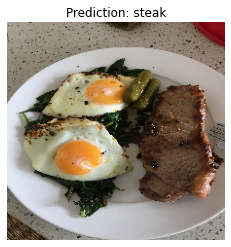

In [91]:
# Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

In [107]:
# Download another test custom image and make a prediction on it

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg


--2022-01-31 11:50:48--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 167.02K  --.-KB/s    in 0.08s   

2022-01-31 11:50:48 (2.17 MB/s) - ‘03-pizza-dad.jpeg’ saved [171033]



In [113]:

pred_and_plot(model_7,"03-pizza-dad.jpeg")

InvalidArgumentError: ignored